# General Funds

In [39]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import mwdsbe
import schuylkill as skool
import time

## Data

In [34]:
registry = mwdsbe.load_registry() # geopandas df

In [3]:
gf = pd.read_excel(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\mwdsbe\data\cwedp_37_report.xlsx', sheet_name='general_funds')

In [4]:
city_payments = pd.read_excel(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\analysis\data\payments\city_payments_detailed_2017.xlsx')

In [5]:
gf.head()

,DR_ACCT,CR_ACCT,CURR_PRIOR_FLAG,POSTED_DATE,DEPT,SEC_FD,INDEX,PROGRAM_CD,MAJ_CLASS,CLASS,DOC_NUM,TRANS_DESC,DOC_REF_NUM,VEND_NAME,VEND_NUM,AMT,DOC_NUM4,DOC_REF4
0,431,101,CURR,2018-07-18,1,10,10058,NaN,1,0101,PAYR1900105401,P.P.E. 07152018,NaN,NaN,NaN,504314.18,PAYR,NaN
1,431,101,CURR,2018-07-18,1,10,10058,NaN,1,0111,PAYR1900105501,P.P.E. 07152018,NaN,NaN,NaN,6653.37,PAYR,NaN
2,431,101,CURR,2018-07-18,1,10,10058,NaN,1,0121,PAYR1900105601,P.P.E. 07152018,NaN,NaN,NaN,13407.00,PAYR,NaN
3,431,101,CURR,2018-07-18,1,10,10058,NaN,1,0161,PAYR1900105701,P.P.E. 07152018,NaN,NaN,NaN,232.50,PAYR,NaN
4,431,101,CURR,2018-08-01,1,10,10058,NaN,1,0101,PAYR1900383001,P.P.E. 07292018,NaN,NaN,NaN,514447.01,PAYR,NaN


In [6]:
len(gf)

324213

In [7]:
gf = gf.loc[gf['MAJ_CLASS'] != 1]

In [8]:
len(gf)

247721

In [9]:
gf = gf.loc[gf['VEND_NAME'].dropna().index]

In [10]:
len(gf)

243375

In [11]:
gf.head()

,DR_ACCT,CR_ACCT,CURR_PRIOR_FLAG,POSTED_DATE,DEPT,SEC_FD,INDEX,PROGRAM_CD,MAJ_CLASS,CLASS,DOC_NUM,TRANS_DESC,DOC_REF_NUM,VEND_NAME,VEND_NUM,AMT,DOC_NUM4,DOC_REF4
76492,433,201,PRIOR,2018-07-05,1,10,10058,NaN,2,0266,VCXX1900006801,*1000465144* MAINT 2 FLDING MAC-6/16,POXX1812248301,PITNEY BOWES INCORPORATED,060495050 01,1320.00,VCXX,POXX
76493,433,201,PRIOR,2018-07-05,1,10,10058,NaN,2,0266,VCXX1900007201,*3306230172* MAIL MAC MTHLY LSE-6/18,POXX1812200301,PITNEY BOWES INCORPORATED,060495050 01,3114.00,VCXX,POXX
76494,433,201,PRIOR,2018-07-05,1,10,10058,NaN,2,0258,VCXX1900008101,*JUN34828S* CRT RPRTING SVS-6/18,POXX1812349101,"STREHLOW & ASSOCIATES, INC.",233036541 01,11125.54,VCXX,POXX
76495,433,201,PRIOR,2018-07-09,1,10,10058,NaN,2,0250,PVMD1802221701,*PCC00318* BROADCAST SERVICES JUNE 2018,MDXX1800005401,WURD - AM,431986554 01,35000.00,PVMD,MDXX
76496,431,201,CURR,2018-07-12,1,10,10058,NaN,2,0285,PVMD1900044801,*072018* RENT JULY 2018,MDXX1902006801,AMERICAN HERITAGE FEDERAL CREDIT UNION,231370526 01,1208.33,PVMD,MDXX


## General Funds by Departments

In [12]:
simple_cp = city_payments[['dept', 'department_title']]

In [13]:
# simple_cp['department_title'] = simple_cp['department_title'].str.split(" ", 1, expand=True)[1]

In [14]:
simple_cp = simple_cp.groupby(['dept', 'department_title']).size().to_frame('N').reset_index()

In [15]:
simple_cp

,dept,department_title,N
0,1,01 CITY COUNCIL,1544
1,3,03 MAYOR'S OFFICE-LABOR RELATIONS,45
2,4,04 MDO-OFFICE OF TECHNOLOGY,4932
3,5,05 MAYOR'S OFFICE,357
4,6,06 OFFICE OF HOUSING,1953
5,8,08 MAYOR'S OFFICE-COMMUNITY SERVICES,426
6,10,10 MANAGING DIRECTOR,31179
7,11,11 POLICE,6680
8,12,12 STREETS,6348
9,13,13 FIRE,4317


In [16]:
gf = gf.merge(simple_cp, how='left', left_on='DEPT', right_on='dept').drop('dept', axis=1)

In [17]:
gf_dept = gf.groupby(['DEPT','department_title'])['AMT'].sum().to_frame('AMT').reset_index()

In [18]:
top_10 = gf_dept.sort_values(by='AMT', ascending=False)[:10]

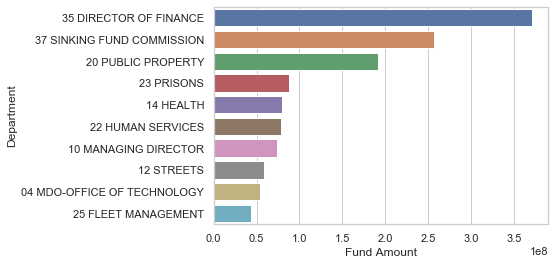

In [19]:
sns.set(style="whitegrid")
ax = sns.barplot(x="AMT", y="department_title", data=top_10)
ax.set(xlabel='Fund Amount', ylabel='Department')
plt.show()

## General Funds by Vendors

In [74]:
gf_vendors = gf.groupby('VEND_NAME')['AMT'].sum().to_frame('AMT').reset_index()

In [75]:
gf_top_10_v = gf_vendors.sort_values(by='AMT', ascending=False)[:10]

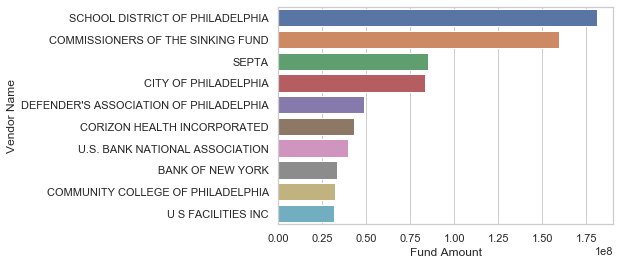

In [77]:
sns.set(style="whitegrid")
ax = sns.barplot(x="AMT", y="VEND_NAME", data=gf_top_10_v)
ax.set(xlabel='Fund Amount', ylabel='Vendor Name')
plt.show()

## Vendors under Director of Finance

In [23]:
finance = gf.loc[gf['department_title'] == '35 DIRECTOR OF FINANCE']

In [24]:
len(finance)

5679

In [29]:
len(finance['VEND_NAME'].unique())

781

In [62]:
finance['VEND_NAME'].unique()

array(['BARRY SCOTT', 'ARTICULATE GLOBAL INC', 'UNITED PARCEL SERVICE',
       'XEROX CORPORATION', 'THE CURLEY ADJUSTMENT BUREAU INC',
       'LAWTON ASSOCIATES, INC.', 'SELECTIVE INSURANCE - FLOOD',
       'HOWARTH OCCUPATIONAL & ENV. CONSULTING P',
       'A V INTERNATIONAL INC', 'OFFICE OF THE DIRECTOR OF FINANCE',
       'BAER CORWIN INSURANCE AGENCY, INC.',
       'WILLIS OF PENNSYLVANIA, INC.', 'WILLIS OF NEW YORK INC',
       'RISK & INSURANCE MGNT SOCIETY, INC RIMS',
       'INSURANCE SOCIETY OF PHILA', 'ENV SERVICES INC',
       'AMERICAN SOCIETY OF SAFETY PROFESSIONALS',
       'HAAS AND WILKERSON INSURANCE INC.', 'SHREEN M. WILLIAMS',
       'NATIONAL SAFETY COUNCIL', 'U S FACILITIES INC',
       'OCCIDENTAL FIRE & CASUALTY COMPANY OF NC', 'SHAROLYN MURPHY',
       'BRADLEY AND BRADLEY ASSOCIATES',
       'SUPERIOR MOVING & STORAGE, INC.', 'THE GRAHAM COMPANY',
       'FACTORY MUTUAL INSURANCE COMPANY', 'SHI INTERNATIONAL CORP',
       'UNITED PARCEL SERVICE INC', 'AXIOMATI

## Unique Vendors of all general funds

In [30]:
len(gf['VEND_NAME'].unique()) # out of 243375

9543

In [32]:
print('Percentage of unique vendors:', 9543 / 243375 * 100, '%')

Percentage of unique vendors: 3.921109399075501 %


## Matching: Fuzz95 + TF-IDF85 

In [37]:
# clean data
ignore_words = ['inc', 'group', 'llc', 'corp', 'pc', 'incorporated', 'ltd', 'co', 'associates', 'services', 'company', 'enterprises', 'enterprise', 'service', 'corporation']
cleaned_registry = skool.clean_strings(registry, ['company_name', 'dba_name'], True, ignore_words)
cleaned_gf = skool.clean_strings(gf, ['VEND_NAME'], True, ignore_words)

cleaned_registry = cleaned_registry.dropna(subset=['company_name'])
cleaned_gf = cleaned_gf.dropna(subset=['VEND_NAME'])

In [47]:
cleaned_gf.to_excel(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\analysis\data\general_funds\cleaned_gf.xlsx', header=True)

In [38]:
len(cleaned_gf)

243375

In [40]:
# Fuzz 95 + TF-IDF 85 with max_matches = 1
t1 = time.time()
merged = (
    skool.fuzzy_merge(cleaned_registry, cleaned_gf, left_on="company_name", right_on="VEND_NAME", score_cutoff=95)
    .pipe(skool.fuzzy_merge, cleaned_registry, cleaned_gf, left_on="dba_name", right_on="VEND_NAME", score_cutoff=95)
    .pipe(skool.tf_idf_merge, cleaned_registry, cleaned_gf, left_on="company_name", right_on="VEND_NAME", score_cutoff=85)
    .pipe(skool.tf_idf_merge, cleaned_registry, cleaned_gf, left_on="dba_name", right_on="VEND_NAME", score_cutoff=85)
)
t = time.time() - t1

In [41]:
print('Execution time:', t/60, 'min')

Execution time: 22.8173419157664 min


In [42]:
matched = merged.dropna(subset=['VEND_NAME'])

In [78]:
matched.to_excel(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\analysis\data\general_funds\fuzz95_tfidf85.xlsx', header=True)

In [44]:
print('Matching:', len(matched), 'out of', len(cleaned_registry))

Matching: 136 out of 3119


In [60]:
unique_vendors = matched['VEND_NAME'].tolist()

In [63]:
full_matched = cleaned_gf.loc[cleaned_gf['VEND_NAME'].apply(lambda x : x in unique_vendors)]

In [64]:
len(full_matched)

5730

In [65]:
full_matched

,DR_ACCT,CR_ACCT,CURR_PRIOR_FLAG,POSTED_DATE,DEPT,SEC_FD,INDEX,PROGRAM_CD,MAJ_CLASS,CLASS,DOC_NUM,TRANS_DESC,DOC_REF_NUM,VEND_NAME,VEND_NUM,AMT,DOC_NUM4,DOC_REF4,department_title,N
2,433,201,PRIOR,2018-07-05,1,10,10058,NaN,2,0258,VCXX1900008101,*JUN34828S* CRT RPRTING SVS-6/18,POXX1812349101,strehlow,233036541 01,11125.54,VCXX,POXX,01 CITY COUNCIL,1544.0
18,433,201,PRIOR,2018-07-19,1,10,10058,NaN,2,0258,VCXX1900408101,*JUL35226S* CRT RPRTING SVS-6/18,POXX1812349101,strehlow,233036541 01,3273.93,VCXX,POXX,01 CITY COUNCIL,1544.0
19,433,201,PRIOR,2018-07-19,1,10,10058,NaN,2,0258,VCXX1900383201,*MAY34385S* CRT RPRTING SVS-4/18&...,POXX1812349101,strehlow,233036541 01,18024.30,VCXX,POXX,01 CITY COUNCIL,1544.0
202,431,201,CURR,2018-08-10,1,10,10058,NaN,2,0258,VCXX1901049401,*JUL35228S* CRT RRT WAIT TIME-6/18,POXX1910295101,strehlow,233036541 01,70.00,VCXX,POXX,01 CITY COUNCIL,1544.0
203,431,201,CURR,2018-08-13,1,10,10058,NaN,2,0258,VCXX1901062201,*JUL35391S* CRT RPRTING SVS-7/18,POXX1910293901,strehlow,233036541 01,587.10,VCXX,POXX,01 CITY COUNCIL,1544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238272,433,201,PRIOR,2018-07-27,23,10,230073,NaN,4,0427,VCXX1900606001,*B08480763* B08480763/EQUIP/06/18,POXX1812162501,shi international,223009648 01,21700.00,VCXX,POXX,23 PRISONS,9230.0
238285,431,201,CURR,2019-06-27,22,10,226280,NaN,4,0427,VCXX1909362302,#B10002045# SCANNER,POXX1912118102,shi international,223009648 01,168.80,VCXX,POXX,22 HUMAN SERVICES,24013.0
238289,431,201,CURR,2019-06-18,22,10,226280,NaN,4,0427,VCXX1909085702,#B10068691# WEBCAM,POXX1912141802,shi international,223009648 01,166.00,VCXX,POXX,22 HUMAN SERVICES,24013.0
238299,433,201,PRIOR,2019-01-08,22,10,226280,NaN,4,0427,VCXX1903988102,#B08440820# ENDRUN,POXX1812335002,shi international,223009648 01,1785.53,VCXX,POXX,22 HUMAN SERVICES,24013.0


## Matched Funds by Vendors

In [67]:
vendors = full_matched.groupby('VEND_NAME')['AMT'].sum().to_frame('AMT').reset_index()

In [69]:
top_10_vendors = vendors.sort_values(by='AMT', ascending=False)[:10]

In [85]:
top_10_vendors

,VEND_NAME,AMT
121,u s facilities,31757950.17
114,team clean,6192914.80
105,scotlandyard security,2416064.47
107,shi international,1308500.36
123,usa environmental management,1283253.50
44,futurenet,1266706.15
13,american uniform sales,1081458.06
24,ciber global,1073983.62
94,progressive life center,977709.98
64,lawton,900000.00


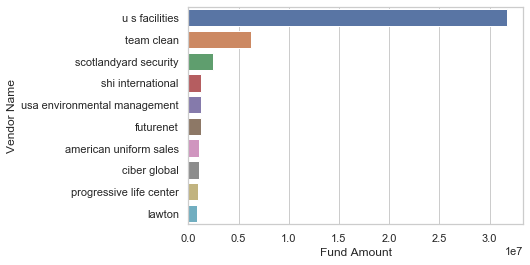

In [70]:
sns.set(style="whitegrid")
ax = sns.barplot(x="AMT", y="VEND_NAME", data=top_10_vendors)
ax.set(xlabel='Fund Amount', ylabel='Vendor Name')
plt.show()

## Matched Funds by Departments

In [71]:
dept = full_matched.groupby('department_title')['AMT'].sum().to_frame('AMT').reset_index()

In [72]:
top_10_dept = dept.sort_values(by='AMT', ascending=False)[:10]

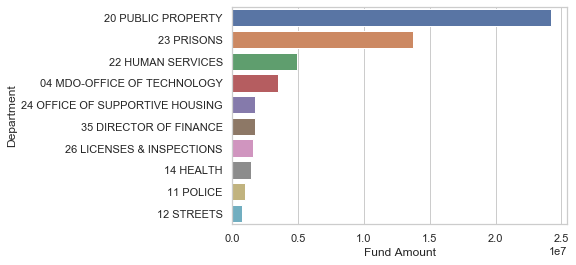

In [73]:
sns.set(style="whitegrid")
ax = sns.barplot(x="AMT", y="department_title", data=top_10_dept)
ax.set(xlabel='Fund Amount', ylabel='Department')
plt.show()

In [79]:
cleaned_registry.loc[cleaned_registry['company_name'].apply(lambda x : 'timi' in x)]

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,mailing_state,mailing_zip,certification_type,capability,local,out_of_state,location_standard,lat,lng,geometry
registry_id,,,,,,,,,,,,,,,,,,,,
2841,timi pharmaceuticals,pelham pharmacy,IDAYAT,ADEWUNMI,"6555 Greene St, Suite #3",Philadelphia,PA,19119.0,"6555 Greene St, Suite #3",Philadelphia,PA,19119.0,MWBE,Pharmacies and Drug Stores; Drugs and Druggist...,True,False,6555 GREENE ST,40.043634,-75.190752,POINT (-75.19075 40.04363)


In [80]:
cleaned_gf.loc[cleaned_gf['VEND_NAME'].apply(lambda x : 'timi' in x)]

,DR_ACCT,CR_ACCT,CURR_PRIOR_FLAG,POSTED_DATE,DEPT,SEC_FD,INDEX,PROGRAM_CD,MAJ_CLASS,CLASS,DOC_NUM,TRANS_DESC,DOC_REF_NUM,VEND_NAME,VEND_NUM,AMT,DOC_NUM4,DOC_REF4,department_title,N
58180,431,201,CURR,2019-02-11,14,10,140690,NaN,2,0250,PVMD1901292301,*2034137* SERVICE FEE FOR KITS JANUARY 2019,MDXX1900089401,timi pharmaceuticals,611654602 01,19450.0,PVMD,MDXX,14 HEALTH,13957.0
58182,431,201,CURR,2019-02-27,14,10,140690,NaN,2,0250,PVMD1901398601,*2034139* SERVICE FEE FOR KITS GIVEN FEBRUARY ...,MDXX1900089401,timi pharmaceuticals,611654602 01,31432.5,PVMD,MDXX,14 HEALTH,13957.0
58207,431,201,CURR,2019-04-22,14,10,140690,NaN,2,0250,PVMD1901752401,*2034152* KITS PROVIDED FOR MARCH 2019,MDXX1900089401,timi pharmaceuticals,611654602 01,53180.0,PVMD,MDXX,14 HEALTH,13957.0


In [82]:
matched.loc[matched['VEND_NAME'].apply(lambda x : 'timi' in x)]

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,...,DOC_NUM,TRANS_DESC,DOC_REF_NUM,VEND_NAME,VEND_NUM,AMT,DOC_NUM4,DOC_REF4,department_title,N
2841,timi pharmaceuticals,pelham pharmacy,IDAYAT,ADEWUNMI,"6555 Greene St, Suite #3",Philadelphia,PA,19119.0,"6555 Greene St, Suite #3",Philadelphia,...,PVMD1901292301,*2034137* SERVICE FEE FOR KITS JANUARY 2019,MDXX1900089401,timi pharmaceuticals,611654602 01,19450.0,PVMD,MDXX,14 HEALTH,13957.0


In [84]:
full_matched.loc[full_matched['VEND_NAME'].apply(lambda x : 'timi' in x)]['AMT'].sum()

104062.5